In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import math

data = pd.read_csv('Combined.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%Y-%m-%d %H:%M:%S')
data.set_index('Timestamp', inplace=True)

data.drop(columns=['Q-PS_MGD_prev_24h_2'], inplace=True)

data.columns

Index(['D1_TEMPERATURE', 'Q-PS_MGD', 'Q-TWAS_GPM', 'V-Boiler_FT3', 'H-HSW_ft',
       'H-Dig1_FT', 'H-Dig2_FT', 'Biogas_burner', 'Biogas_boiler', 'Q-HSW_GPM',
       'Biogas_prev_hour_avg', 'hour_sin', 'hour_cos', 'H-Dig1-deriv_FTpermin',
       'H-Dig2-deriv_FTpermin', 'V-burner_FT3-2', 'Q-PS_MGD_prev_24h',
       'Q-TWAS_GPM_prev_24h', 'Q-HSW_GPM_prev_24h', 'Biogas_prev_24h',
       'Biogas_prev_24h_1', 'Biogas_prev_24h_2', 'Biogas_prev_24h_3',
       'Biogas_prev_24h_4', 'Q-HSW_GPM_prev_24h_1', 'Q-HSW_GPM_prev_24h_2',
       'Q-HSW_GPM_prev_24h_3', 'Q-HSW_GPM_prev_24h_4', 'Q-PS_MGD_prev_24h_1',
       'Q-PS_MGD_prev_24h_3', 'Q-PS_MGD_prev_24h_4', 'Q-TWAS_GPM_prev_24h_1',
       'Q-TWAS_GPM_prev_24h_2', 'Q-TWAS_GPM_prev_24h_3',
       'Q-TWAS_GPM_prev_24h_4', 'Forecast', 'HSW-VS-load', 'HSW-VS-load_1',
       'HSW-VS-load_6'],
      dtype='object')

In [2]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(
    data.drop('Forecast', axis=1), data['Forecast'], test_size=0.2,
    shuffle=False)

# Initialize scaler object
scaler = StandardScaler()

# Fit the scaler on the training dataset
scaler.fit(x_train)

# Transform the training and testing dataset
x_train_s = pd.DataFrame(scaler.transform(x_train), index=x_train.index)
x_test_s = pd.DataFrame(scaler.transform(x_test), index=x_test.index)

# Add the column names back
x_train_s.columns = x_train.columns
x_test_s.columns = x_test.columns

# Check to make sure everything looks right
x_train_s

,D1_TEMPERATURE,Q-PS_MGD,Q-TWAS_GPM,V-Boiler_FT3,H-HSW_ft,H-Dig1_FT,H-Dig2_FT,Biogas_burner,Biogas_boiler,Q-HSW_GPM,...,Q-PS_MGD_prev_24h_1,Q-PS_MGD_prev_24h_3,Q-PS_MGD_prev_24h_4,Q-TWAS_GPM_prev_24h_1,Q-TWAS_GPM_prev_24h_2,Q-TWAS_GPM_prev_24h_3,Q-TWAS_GPM_prev_24h_4,HSW-VS-load,HSW-VS-load_1,HSW-VS-load_6
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-03-23 00:00:00,-0.568071,-0.191843,-0.339807,3.033354,-0.518552,0.467235,1.786058,0.959180,1.270919,0.848766,...,-0.485030,-0.427304,-0.380711,0.621969,0.564729,0.600907,0.720826,1.279052,1.360607,0.936140
2022-03-23 00:01:00,-0.469175,5.150879,-0.339807,-1.359258,-0.508768,0.483399,1.786058,0.939302,1.304285,0.848766,...,-0.462671,-0.438358,-0.389442,0.621969,0.564733,0.588226,0.733499,1.279052,1.360607,0.936140
2022-03-23 00:02:00,-0.644991,5.042593,-0.339807,-1.354836,-0.498985,0.483399,1.786058,0.931350,1.316394,0.882829,...,-0.440125,-0.447302,-0.394109,0.621973,0.564733,0.588230,0.733491,1.279052,1.360607,0.936140
2022-03-23 00:03:00,-0.491152,-0.191843,-0.339807,-1.350406,-0.479417,0.483399,1.786058,0.890267,1.313434,0.847550,...,-0.453339,-0.426987,-0.394113,0.621977,0.564729,0.588234,0.733487,1.279052,1.360607,0.936140
2022-03-23 00:04:00,-0.568071,-0.191843,-0.339807,-1.345978,-0.489201,0.483399,1.786058,0.927374,1.316394,0.847550,...,-0.453339,-0.408983,-0.394113,0.621977,0.564733,0.588234,0.733483,1.279052,1.360607,0.936140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-21 12:47:00,-0.084576,-0.192523,-0.340818,0.917007,0.684853,1.097632,2.144065,1.673486,1.881204,0.851199,...,-0.088183,-0.008870,0.050406,0.293713,0.483171,0.375190,0.150280,0.423154,0.071307,1.109681
2022-12-21 12:48:00,-0.117542,-0.192523,-0.339807,0.922629,0.684853,1.097632,2.144065,1.665535,1.939864,0.848766,...,-0.088183,-0.008867,0.050406,0.293721,0.483167,0.375186,0.150284,0.423154,0.071307,1.109681
2022-12-21 12:49:00,-0.051611,-0.192523,-0.340818,0.928309,0.675069,1.097632,2.144065,1.693365,1.953050,0.885262,...,-0.088183,-0.008870,0.050409,0.293717,0.473164,0.385194,0.150284,0.423154,0.071307,1.109681


In [3]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit

cv=TimeSeriesSplit(gap = 300)
model_lm = RidgeCV(cv=cv) 

model_lm.fit(x_train_s, y_train)

# Predict using the fitted model
y_train_lm = model_lm.predict(x_train_s)
y_test_lm = model_lm.predict(x_test_s)

# Calculate training and testing error
mse_train_lm = mean_squared_error(y_train, y_train_lm)
mape_train_lm = mean_absolute_percentage_error(y_train, y_train_lm)
r2_train_lm = r2_score(y_train, y_train_lm)
rmse_train = math.sqrt(mse_train_lm)
mse_test_lm = mean_squared_error(y_test, y_test_lm)
mape_test_lm = mean_absolute_percentage_error(y_test, y_test_lm)
r2_test_lm = r2_score(y_test, y_test_lm)
rmse_test = math.sqrt(mse_test_lm)

# Print training and testing error
print(f"Training Mean Squared Error (MSE): {round(mse_train_lm,3)}")
print(f"Training Root Mean Squared Error (MSE): {round(rmse_train,3)}")
print(f"Training Mean Absolute Percentage Error (MAPE): {round(mape_train_lm,3)}")
print(f"Training R-squared (R2) Score: {round(r2_train_lm,3)}")
print(f"Testing Mean Squared Error (MSE): {round(mse_test_lm,3)}")
print(f"Testing Root Mean Squared Error (MSE): {round(rmse_test,3)}")
print(f"Testing Mean Absolute Percentage Error (MAPE): {round(mape_test_lm,3)}")
print(f"Testing R-squared (R2) Score: {round(r2_test_lm,3)}")

def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

n = len(x_test_s)  # Number of samples in test data
k = len(x_train_s.columns)  # Number of predictors in the model

# Calculate Adjusted R-squared
adjusted_r2_value = adjusted_r2(r2_test_lm, n, k)
print("Adjusted R-squared:", round(adjusted_r2_value,3))
print("Number of variables:",k)
TeEI = (mape_test_lm*mape_test_lm*rmse_test)/adjusted_r2_value
print("TeEI:", round(TeEI,3))

Training Mean Squared Error (MSE): 296.285
Training Root Mean Squared Error (MSE): 17.213
Training Mean Absolute Percentage Error (MAPE): 0.142
Training R-squared (R2) Score: 0.776
Testing Mean Squared Error (MSE): 455.339
Testing Root Mean Squared Error (MSE): 21.339
Testing Mean Absolute Percentage Error (MAPE): 0.14
Testing R-squared (R2) Score: 0.752
Adjusted R-squared: 0.752
Number of variables: 38
TeEI: 0.56


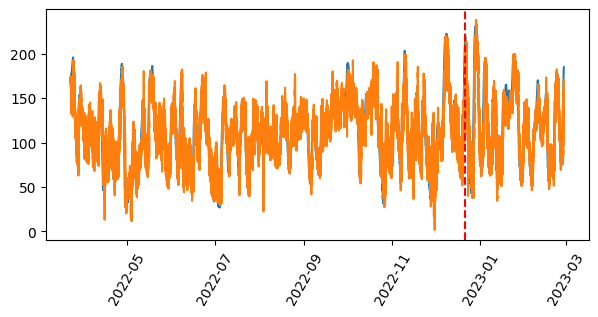

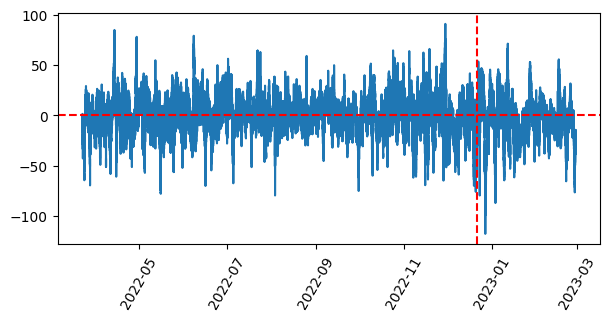

In [4]:
import matplotlib.pyplot as plt

# Plot timeseries
fig = plt.figure(figsize=(7, 3))
x =  data.index
y1 = data['Forecast'] # Forecast
y2 = np.concatenate((y_train_lm, y_test_lm))
v = data.index[y_train_lm.shape[0]]
plt.plot(x, y1, label='actual')
plt.plot(x, y2, label='linear')
plt.axvline(x=v, color='r', linestyle='--')
plt.xticks(rotation =60.0); 
plt.show()

# Plot residuals
fig = plt.figure(figsize=(7, 3))
x =  data.index
y1 = data['Forecast'] # Forecast
y2 = np.concatenate((y_train_lm, y_test_lm))
v = data.index[y_train_lm.shape[0]]
plt.plot(x, y2-y1, label='residuals')
plt.axvline(x=v, color='r', linestyle='--')
plt.axhline(y=0, color='r', linestyle='--')
plt.xticks(rotation =60.0); 
plt.show()

(0.0, 250.0)

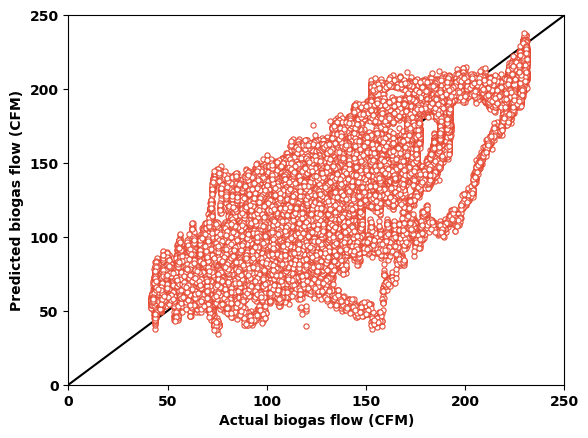

In [5]:
from matplotlib.font_manager import FontProperties
font_props = FontProperties(family='DejaVu Sans', weight='bold')

# Shuffle the data randomly for plotting
permutation = np.random.permutation(len(y_test))
y_tests = y_test[permutation]
y_test_lms = y_test_lm[permutation]

true_data = [0, 250]
plt.plot(true_data, true_data, 'k', zorder=1, label='_')

# Plot the shuffled predicted values
scatter = plt.scatter(y_tests, y_test_lms, marker='o', s=14, linewidths=0.8, edgecolors='#E64B35FF', facecolors='w', label='', zorder=2)

plt.xticks(rotation=0, fontproperties=font_props)
plt.yticks(fontproperties=font_props)

# Graph labels
plt.xlabel('Actual biogas flow (CFM)', fontproperties=font_props)
plt.ylabel('Predicted biogas flow (CFM)', font_properties=font_props)
plt.xlim(0, 250)
plt.ylim(0, 250)